In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("Sample - Superstore.xls")

### Exercise 8: Missing values in Pandas

In [3]:
df_missing=pd.read_excel("Sample - Superstore.xls",sheet_name="Missing")

In [4]:
df_missing

,Customer,Product,Sales,Quantity,Discount,Profit
0,Brosina Hoffman,NaN,1706.184,9.0,0.2,85.3092
1,Brosina Hoffman,Phones,911.424,4.0,0.2,68.3568
2,Zuschuss Donatelli,Art,8.560,2.0,0.0,2.4824
3,Zuschuss Donatelli,Phones,NaN,3.0,0.2,16.0110
4,Zuschuss Donatelli,Binders,22.720,4.0,0.2,7.3840
5,Eric Hoffmann,Binders,11.648,NaN,0.2,4.2224
6,Eric Hoffmann,Accessories,90.570,3.0,0.0,11.7741
7,Ruben Ausman,NaN,77.880,2.0,0.0,NaN
8,NaN,Accessories,13.980,2.0,0.0,6.1512
9,Kunst Miller,Binders,25.824,6.0,0.2,9.3612


In [5]:
df_missing.isnull()

,Customer,Product,Sales,Quantity,Discount,Profit
0,False,True,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,True,False,False,False
4,False,False,False,False,False,False
5,False,False,False,True,False,False
6,False,False,False,False,False,False
7,False,True,False,False,False,True
8,True,False,False,False,False,False
9,False,False,False,False,False,False


In [6]:
for c in df_missing.columns:
    miss = df_missing[c].isnull().sum()
    if miss>0:
        print("{} has {} missing value(s)".format(c,miss))
    else:
        print("{} has NO missing value!".format(c))

Customer has 1 missing value(s)
Product has 2 missing value(s)
Sales has 1 missing value(s)
Quantity has 1 missing value(s)
Discount has NO missing value!
Profit has 1 missing value(s)


### Exercise 9: Filling missing values with `fillna()`

In [7]:
df_missing.fillna('FILL')

,Customer,Product,Sales,Quantity,Discount,Profit
0,Brosina Hoffman,FILL,1706.18,9,0.2,85.3092
1,Brosina Hoffman,Phones,911.424,4,0.2,68.3568
2,Zuschuss Donatelli,Art,8.56,2,0.0,2.4824
3,Zuschuss Donatelli,Phones,FILL,3,0.2,16.011
4,Zuschuss Donatelli,Binders,22.72,4,0.2,7.384
5,Eric Hoffmann,Binders,11.648,FILL,0.2,4.2224
6,Eric Hoffmann,Accessories,90.57,3,0.0,11.7741
7,Ruben Ausman,FILL,77.88,2,0.0,FILL
8,FILL,Accessories,13.98,2,0.0,6.1512
9,Kunst Miller,Binders,25.824,6,0.2,9.3612


In [8]:
df_missing[['Customer','Product']].fillna('FILL')

,Customer,Product
0,Brosina Hoffman,FILL
1,Brosina Hoffman,Phones
2,Zuschuss Donatelli,Art
3,Zuschuss Donatelli,Phones
4,Zuschuss Donatelli,Binders
5,Eric Hoffmann,Binders
6,Eric Hoffmann,Accessories
7,Ruben Ausman,FILL
8,FILL,Accessories
9,Kunst Miller,Binders


In [9]:
df_missing['Sales'].fillna(method='ffill')

0     1706.184
1      911.424
2        8.560
3        8.560
4       22.720
5       11.648
6       90.570
7       77.880
8       13.980
9       25.824
10     146.730
Name: Sales, dtype: float64

In [10]:
df_missing['Sales'].fillna(method='bfill')

0     1706.184
1      911.424
2        8.560
3       22.720
4       22.720
5       11.648
6       90.570
7       77.880
8       13.980
9       25.824
10     146.730
Name: Sales, dtype: float64

In [11]:
df_missing['Sales'].fillna(df_missing.mean()['Sales'])

0     1706.184
1      911.424
2        8.560
3      301.552
4       22.720
5       11.648
6       90.570
7       77.880
8       13.980
9       25.824
10     146.730
Name: Sales, dtype: float64

### Exercise 10: Dropping missing values with `dropna()`

In [12]:
df_missing.dropna(axis=0)

,Customer,Product,Sales,Quantity,Discount,Profit
1,Brosina Hoffman,Phones,911.424,4.0,0.2,68.3568
2,Zuschuss Donatelli,Art,8.560,2.0,0.0,2.4824
4,Zuschuss Donatelli,Binders,22.720,4.0,0.2,7.3840
6,Eric Hoffmann,Accessories,90.570,3.0,0.0,11.7741
9,Kunst Miller,Binders,25.824,6.0,0.2,9.3612
10,Kunst Miller,Paper,146.730,3.0,0.0,68.9631


In [13]:
df_missing.dropna(axis=1)

,Discount
0,0.2
1,0.2
2,0.0
3,0.2
4,0.2
5,0.2
6,0.0
7,0.0
8,0.0
9,0.2


In [14]:
df_missing.dropna(axis=1,thresh=10)

,Customer,Sales,Quantity,Discount,Profit
0,Brosina Hoffman,1706.184,9.0,0.2,85.3092
1,Brosina Hoffman,911.424,4.0,0.2,68.3568
2,Zuschuss Donatelli,8.560,2.0,0.0,2.4824
3,Zuschuss Donatelli,NaN,3.0,0.2,16.0110
4,Zuschuss Donatelli,22.720,4.0,0.2,7.3840
5,Eric Hoffmann,11.648,NaN,0.2,4.2224
6,Eric Hoffmann,90.570,3.0,0.0,11.7741
7,Ruben Ausman,77.880,2.0,0.0,NaN
8,NaN,13.980,2.0,0.0,6.1512
9,Kunst Miller,25.824,6.0,0.2,9.3612


### Exercise 11: Outlier detection using simple statistical test

In [15]:
df_sample = df[['Customer Name','State','Sales','Profit']].sample(n=50).copy()

In [16]:
# Assign a wrong (negative value) in few places
df_sample['Sales'].iloc[5]=-1000.0
df_sample['Sales'].iloc[15]=-500.0

c:\users\tirtha\python\anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


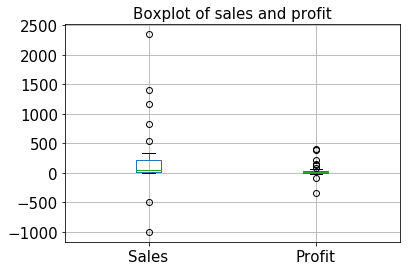

In [17]:
df_sample.plot.box()
plt.title("Boxplot of sales and profit", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)